In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from IPython.display import Image
im2 = Image('fig2.jpg')
im1 = Image('fig1.jpg')

# Experiment 2 - Circular Polarization
## Objective
Explore the effect of different combinations of quarter wave plates on linearly polarized light.  

## Method
1. For the first Observation/Analysis, arrange the laser, Polarizer 1, Quarter-Wave Plate (abbrieviated as QWP below) 1 and 2 in the correct order to create a HWP as illustrated in the diagram below:   

![Experiment 2](fig2.jpg)

2. Place a screen where the eye is in the diagram, and place another linear polarizer between the second QWP and the screen.

3. Rotate the second linear polarizer to determine if the light is at least roughly linearly polarized.

4. For the second Observation/Analysis, set up materials again according to the above diagram, but this time turn the second QWP so its fast axis is perpendicular to the first QWP's fast axis.  Place a photodetector where the eye is in the diagram.

5. Take data to demonstrate that when the fast axis of QWP 2 is perpendicular to the fast axis of QWP 1, the transmitted light is still linearly polarized. Determine the orientation of the polarization axis. Compare the measured polarization axis to the predicted polarization axis. 

### Answer

#### Observation/Analysis 1:
By turning the second linear polarizer, we observed that the brightness of the transmitted beam varied sinusoidally as we turned the linear polarizer.  We also observed the transmitted beam was brightest when the second linear polarizer was horizontal, which indicates the transmitted beam was horizontally polarized.  

This result agreed with theoretical prediction, because a half-wave plate should decrease the phase of one component of linearly-polarized light by a factor of $\frac{\pi}{2}$, and if the half-wave plate is oriented with fast axis making a $\frac{\pi}{4}$ with the polarization angle of the incident light, we expect the transmitted light to be perpendicularly polarized to the incident light.  

#### Observation/Analysis 2

We predict that the polarization axis will be the same as its original orientation, because the combination of two QWP will shift both wave components  faster by $\frac{\pi}{2}$ phase, which has no effect on the transmission axis of the light. 

In the data table below, 'theta' denotes the clockwise angle difference between QWP 2's fast axis and the vertical axis, with unit degree; 'delta_theta' denotes the error associated with the angle difference, with unit degree; 'I' denotes the intensity of transmitted light, with unit lux; 'delta_I' denotes the error associated with the intensity, with unit lux.


In [9]:
df

,theta,delta_theta,I,delta_I
0,0,1,4270,5
1,15,1,3470,5
2,30,1,2647,5
3,45,1,1392,5
4,60,1,298,5
5,75,1,34,5
6,90,1,6,5


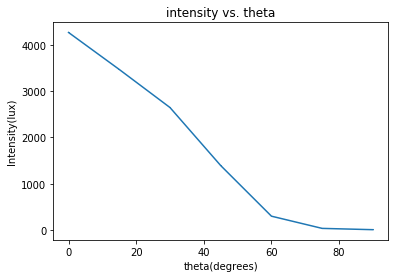

In [15]:
plt.errorbar(df.theta, df.I, yerr = df.delta_I)
plt.xlabel('theta(degrees)')
plt.ylabel('Intensity(lux)')
plt.title('intensity vs. theta')
plt.show()

Note: Because the error bars for intensity is very small, they're hardly visible in the graph above.

From the data table, we observed that the intensity of transmitted light varies sinusoidally as the axis of Polarizer 2 rotates, and reaches its maximum when the axis is vertically oriented. This shows that the light is still linearly polarized with its polarization axis vertically oriented, which agrees with our prediction.  

# Experiment 3 - Optical Activity of Corn Syrup

## Objective
Explore the optical activity of a given sample of corn syrup rotating the polarization axis of linearly polarized light

## Method
Setup as illustrated in the diagram below:

![Experiment 3](fig1.jpg)

Measure the height $l$ of the corn syrup in each cylinder
Determine the __optical rotation angle__ $\alpha$ for each corn syrup sample. 

In the data table below, 'l' denotes the height of corn syrup, with unit centimeter; 'delta_l' denotes the error associated with the height, with unit centimeter; 'alpha' denotes the optical rotation angle clockwise from the positive vertical axis for each corn syrup sample, with unit degrees; 'delta_alpha' denotes the error associated with the optical rotation angle, with unit degrees.


In [27]:
df1

,l,delta_l,alpha,delta_alpha
0,5.1,0.1,-65,1
1,3.4,0.1,74,1
2,2.5,0.1,61,1
3,1.4,0.1,19,1


## Data Analysis

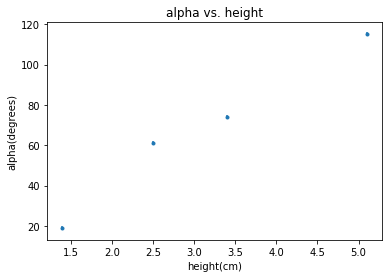

In [39]:
plt.errorbar(df1.l, df1.alpha, yerr = df1.delta_alpha, fmt = '.')
plt.xlabel('height(cm)')
plt.ylabel('alpha(degrees)')
plt.title('alpha vs. height')
plt.show()

Note: Because the error bars for alpha are very small, they're hardly visible in the graph above.

b). Using the direct proportionality hypothesis, we yielded that the gradient of this linear fit model $c[\alpha] = 22.22\pm3.45$, with a coefficient of determination of $0.975$, which is a fairly good fit. 

c). From the given corn syrup concentration, the specific rotation is $[\alpha] = gradient/c = 66.7\pm10.4$   

d). Using accepted value of $52.7^{\circ}mL/dm  \cdot g$, the agreement test value is 0.67. This value is smaller than 1, so our result is in agreement with the accepted value.



In [48]:
df1['xy'] = df1['l'] * df1['alpha']
df1['x_square'] = df1['l']**2
xy_mean = np.mean(df1['xy'])
x_square_mean = np.mean(df1['x_square'])
m_hat = xy_mean / x_square_mean
print(m_hat)

22.219309742245525


In [54]:
df1['y_mhatx'] = df1['alpha'] - m_hat * df1['l']
df1['ymx_square'] = df1['y_mhatx']**2
ymxsq_sum = np.sum(df1['ymx_square'])
y_error = np.sqrt(3 * ymxsq_sum)
mhat_error = y_error/(np.sqrt(4 * x_square_mean))
print(mhat_error)

3.448916959069044


In [41]:
x = np.array(df1['l']).reshape(-1, 1)
y = df1['alpha']
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9754420008718302
intercept: -10.165531335149865
slope: [24.97275204]


In [8]:
data = {'theta': [0, 15, 30, 45, 60, 75, 90], 
        'delta_theta':[1, 1, 1, 1, 1, 1, 1], 
        'I': [4270, 3470, 2647, 1392, 298, 34, 6], 
        'delta_I': [5, 5, 5, 5, 5, 5, 5]}
df = pd.DataFrame(data)

In [38]:
data = {'l': [5.1, 3.4, 2.5, 1.4], 
        'delta_l': [0.1, 0.1, 0.1, 0.1], 
        'alpha': [115, 74, 61, 19], 
        'delta_alpha': [1, 1, 1, 1]}
df1 = pd.DataFrame(data)

In [55]:
22.22/(1/3)

66.66

In [56]:
3.45*3

10.350000000000001

In [57]:
(66.7 - 52.7)/(2*10.4)

0.673076923076923